# **Packages**

In [ ]:
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# **Data Introduction, Resizing & Normalization**

In [ ]:
drive.mount('/content/drive')

### DATA EXTRACTION FROM FOLDERS INTO RELEVANT CLASSIFICATIONS ###

train_folder_path_no = '/content/drive/MyDrive/chest_xray/train/NORMAL'
train_folder_path_yes = '/content/drive/MyDrive/chest_xray/train/PNEUMONIA'

val_folder_path_no = '/content/drive/MyDrive/chest_xray/val/NORMAL'
val_folder_path_yes = '/content/drive/MyDrive/chest_xray/val/PNEUMONIA'


test_folder_path_no = '/content/drive/MyDrive/chest_xray/test/NORMAL'
test_folder_path_yes = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA'

# Define function to read and resize images
def read_and_resize_image(img_path, new_width, new_height):
    img = cv2.imread(img_path)  # Read image
    resized_img = cv2.resize(img, (new_width, new_height))  # Resize image
    return resized_img

# Define function to read and resize images in a list
def read_and_resize_images(image_list, folder_path, new_width, new_height):
    resized_images = []
    for filename in image_list:
        img_path = os.path.join(folder_path, filename)
        resized_img = read_and_resize_image(img_path, new_width, new_height)
        resized_images.append(resized_img)
    return np.array(resized_images)  # Convert list of images to numpy array

#We can use listdir to place all of the photos into a respective list

import cv2
train_list_no = os.listdir(train_folder_path_no)
train_list_yes = os.listdir(train_folder_path_yes)

val_list_no = os.listdir(val_folder_path_no)
val_list_yes = os.listdir(val_folder_path_yes)

test_list_no = os.listdir(test_folder_path_no)
test_list_yes = os.listdir(test_folder_path_yes)


### APPLY FUNCTIONS TO RESIZE IMAGES ###

# Read and resize images
new_width = 224  # New width in pixels
new_height = 224  # New height in pixels

#Resize the images and normalise them by dividing by 255

train_resized_no = read_and_resize_images(train_list_no[:750], train_folder_path_no, new_width, new_height) /255
train_resized_yes = read_and_resize_images(train_list_yes[:750], train_folder_path_yes, new_width, new_height) /255

val_resized_no = read_and_resize_images(val_list_no[:250], val_folder_path_no, new_width, new_height) /255
val_resized_yes = read_and_resize_images(val_list_yes[:250], val_folder_path_yes, new_width, new_height) /255

test_resized_no = read_and_resize_images(test_list_no[:250], test_folder_path_no, new_width, new_height) /255
test_resized_yes = read_and_resize_images(test_list_yes[:250], test_folder_path_yes, new_width, new_height) / 255

Mounted at /content/drive


# **Data Augmentation**

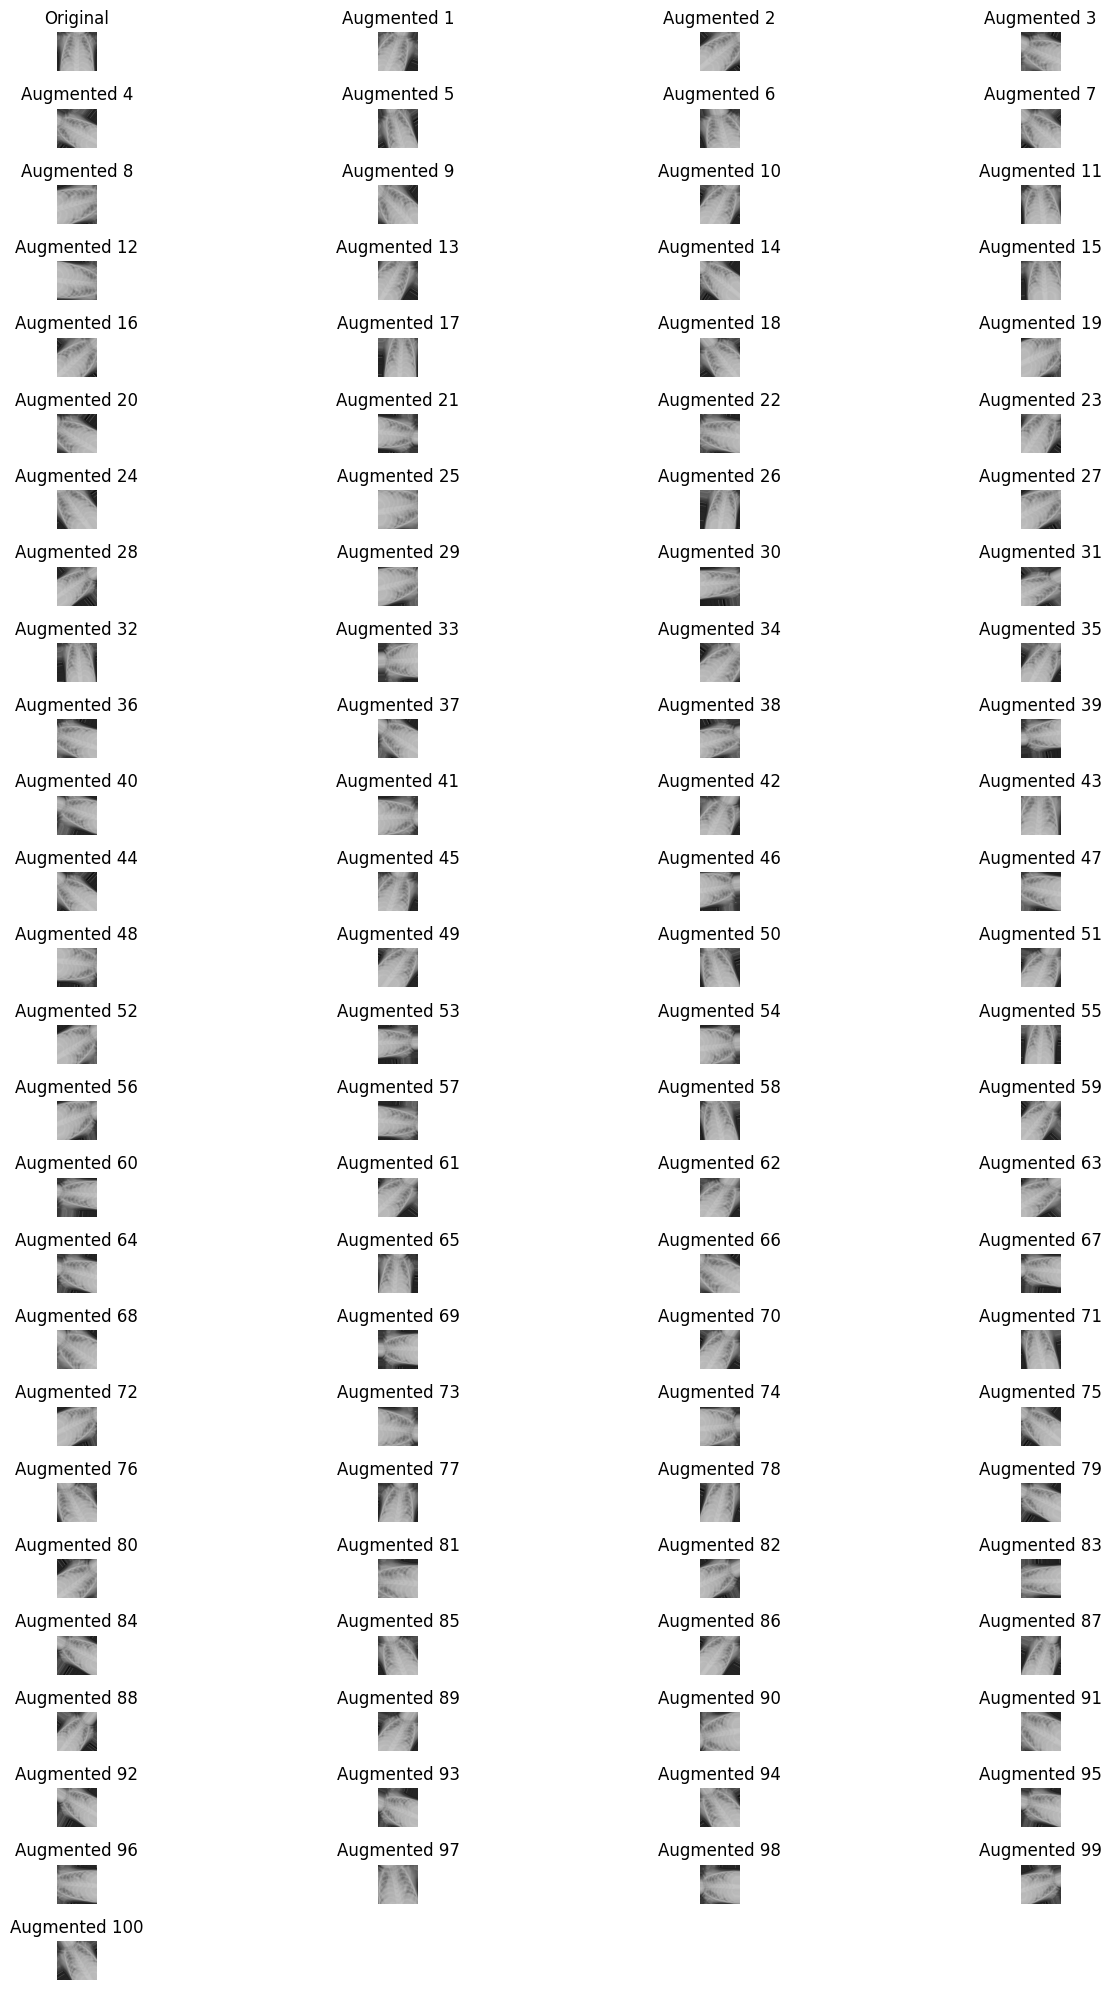

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=100,      # Rotate the image by a random angle within the specified range (in degrees)
    width_shift_range=0.1,  # Shift the image horizontally (fraction of total width)
    height_shift_range=0.1, # Shift the image vertically (fraction of total height)
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Zoom the image in/out (range for random zoom)
    horizontal_flip=True,  # Flip the image horizontally
    fill_mode='nearest'     # Fill points outside the boundaries using the nearest available value
)

# Load an example image
# Assuming 'image' is a NumPy array representing an image of shape (height, width, channels)

# Reshape the image to add the batch dimension
image = np.expand_dims(train_resized_yes[3], axis=0)

# Generate augmented images
num_augmented_images = 100  # Number of augmented images to generate
augmented_images = []

# Generate augmented images using the data generator
for _ in range(num_augmented_images):
    augmented_image = next(datagen.flow(image))[0]  # Generate augmented image augmented_image = next(datagen.flow(image))[0]
    augmented_image = (augmented_image * 255).astype(np.uint8)  # Convert to uint8 and scale to [0, 255]
    augmented_images.append(augmented_image)

# Display the original and augmented images
plt.figure(figsize=(13,20))
for i in range(num_augmented_images + 1):
    plt.subplot(26, 4, i + 1)
    if i == 0:
        plt.imshow(image.squeeze(), cmap='gray')  # Display the original image
        plt.title('Original')
    else:
        plt.imshow(augmented_images[i - 1].squeeze(), cmap='gray')  # Display augmented images
        plt.title(f'Augmented {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

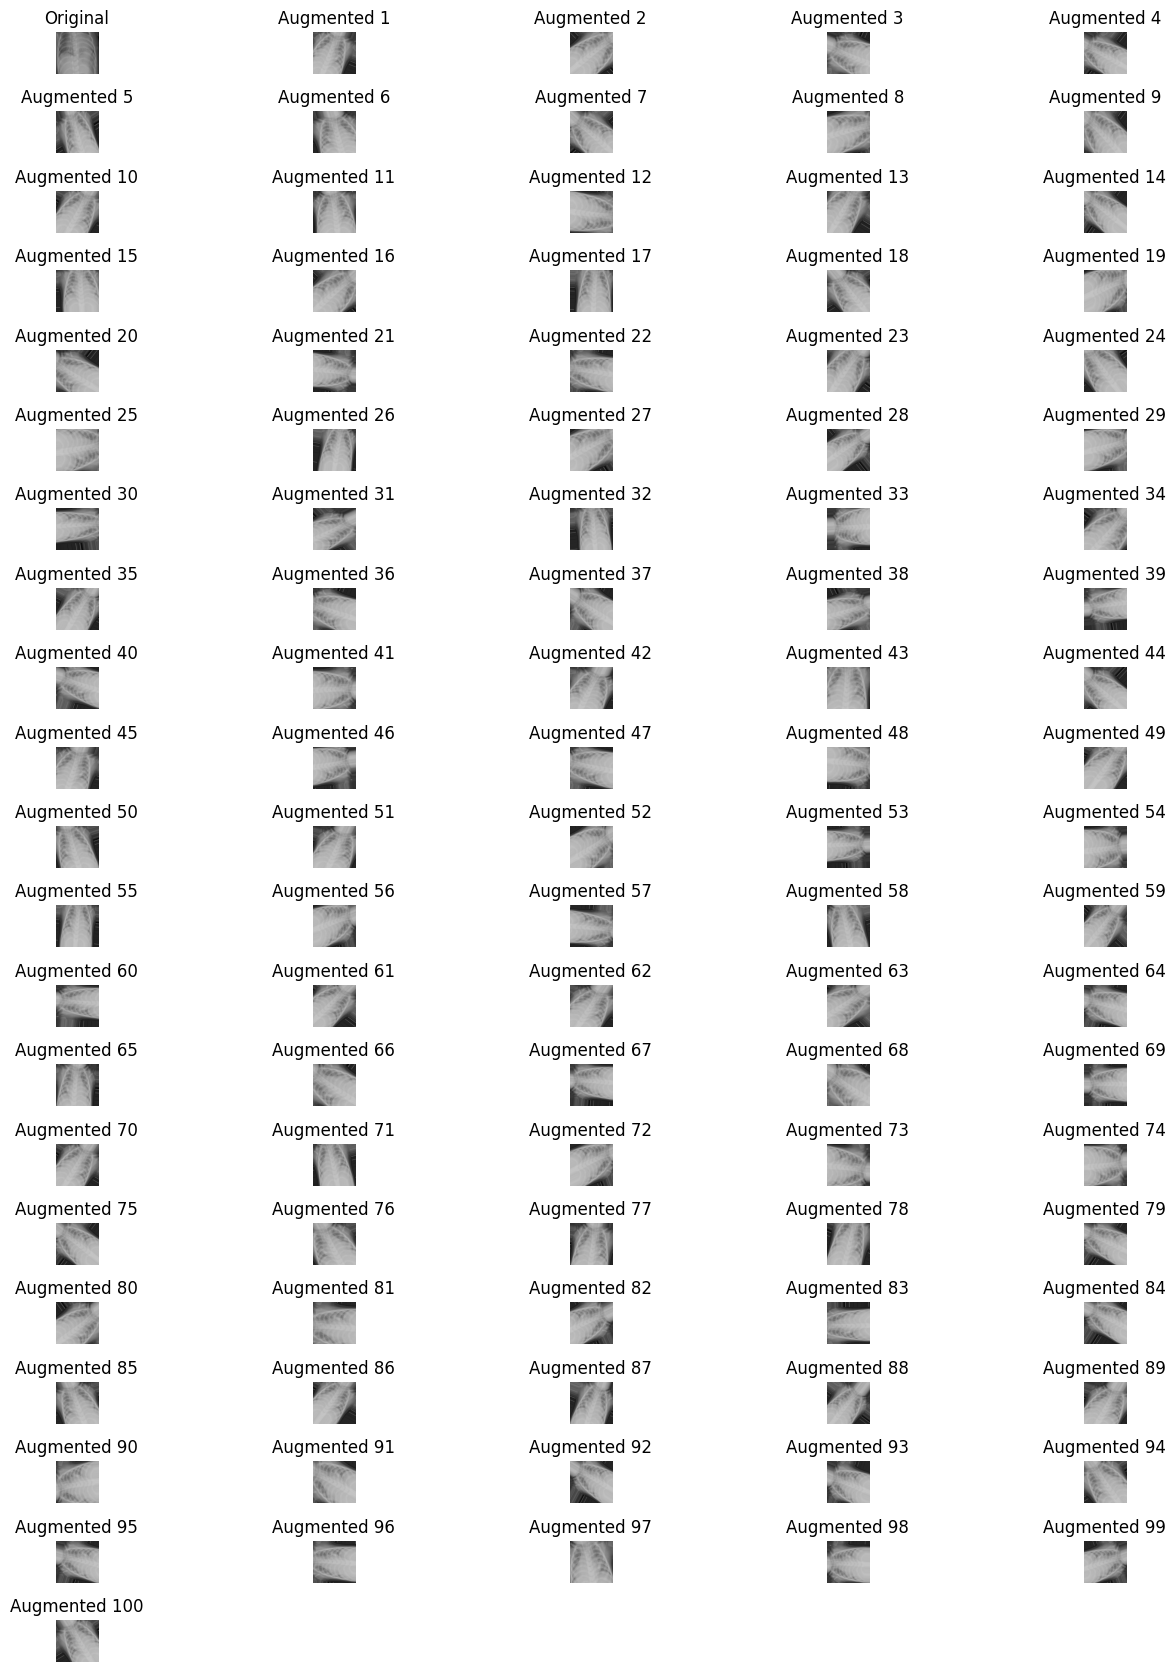

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=100,      # Rotate the image by a random angle within the specified range (in degrees)
    width_shift_range=0.1,  # Shift the image horizontally (fraction of total width)
    height_shift_range=0.1, # Shift the image vertically (fraction of total height)
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Zoom the image in/out (range for random zoom)
    horizontal_flip=True,  # Flip the image horizontally
    fill_mode='nearest'     # Fill points outside the boundaries using the nearest available value
)

# Load an example image
# Assuming 'image' is a NumPy array representing an image of shape (height, width, channels)

# Reshape the image to add the batch dimension
image = np.expand_dims(train_resized_yes[4], axis=0)

# Generate augmented images
num_augmented_images = 100  # Number of augmented images to generate
augmented_images2 = []

# Generate augmented images using the data generator
for _ in range(num_augmented_images):
    augmented_image = next(datagen.flow(image))[0]  # Generate augmented image augmented_image = next(datagen.flow(image))[0]
    augmented_image = (augmented_image * 255).astype(np.uint8)  # Convert to uint8 and scale to [0, 255]
    augmented_images2.append(augmented_image)

# Display the original and augmented images
plt.figure(figsize=(13, 20))
for i in range(num_augmented_images + 1):
    plt.subplot(25, 5, i + 1)
    if i == 0:
        plt.imshow(image.squeeze(), cmap='gray')  # Display the original image
        plt.title('Original')
    else:
        plt.imshow(augmented_images[i - 1].squeeze(), cmap='gray')  # Display augmented images
        plt.title(f'Augmented {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

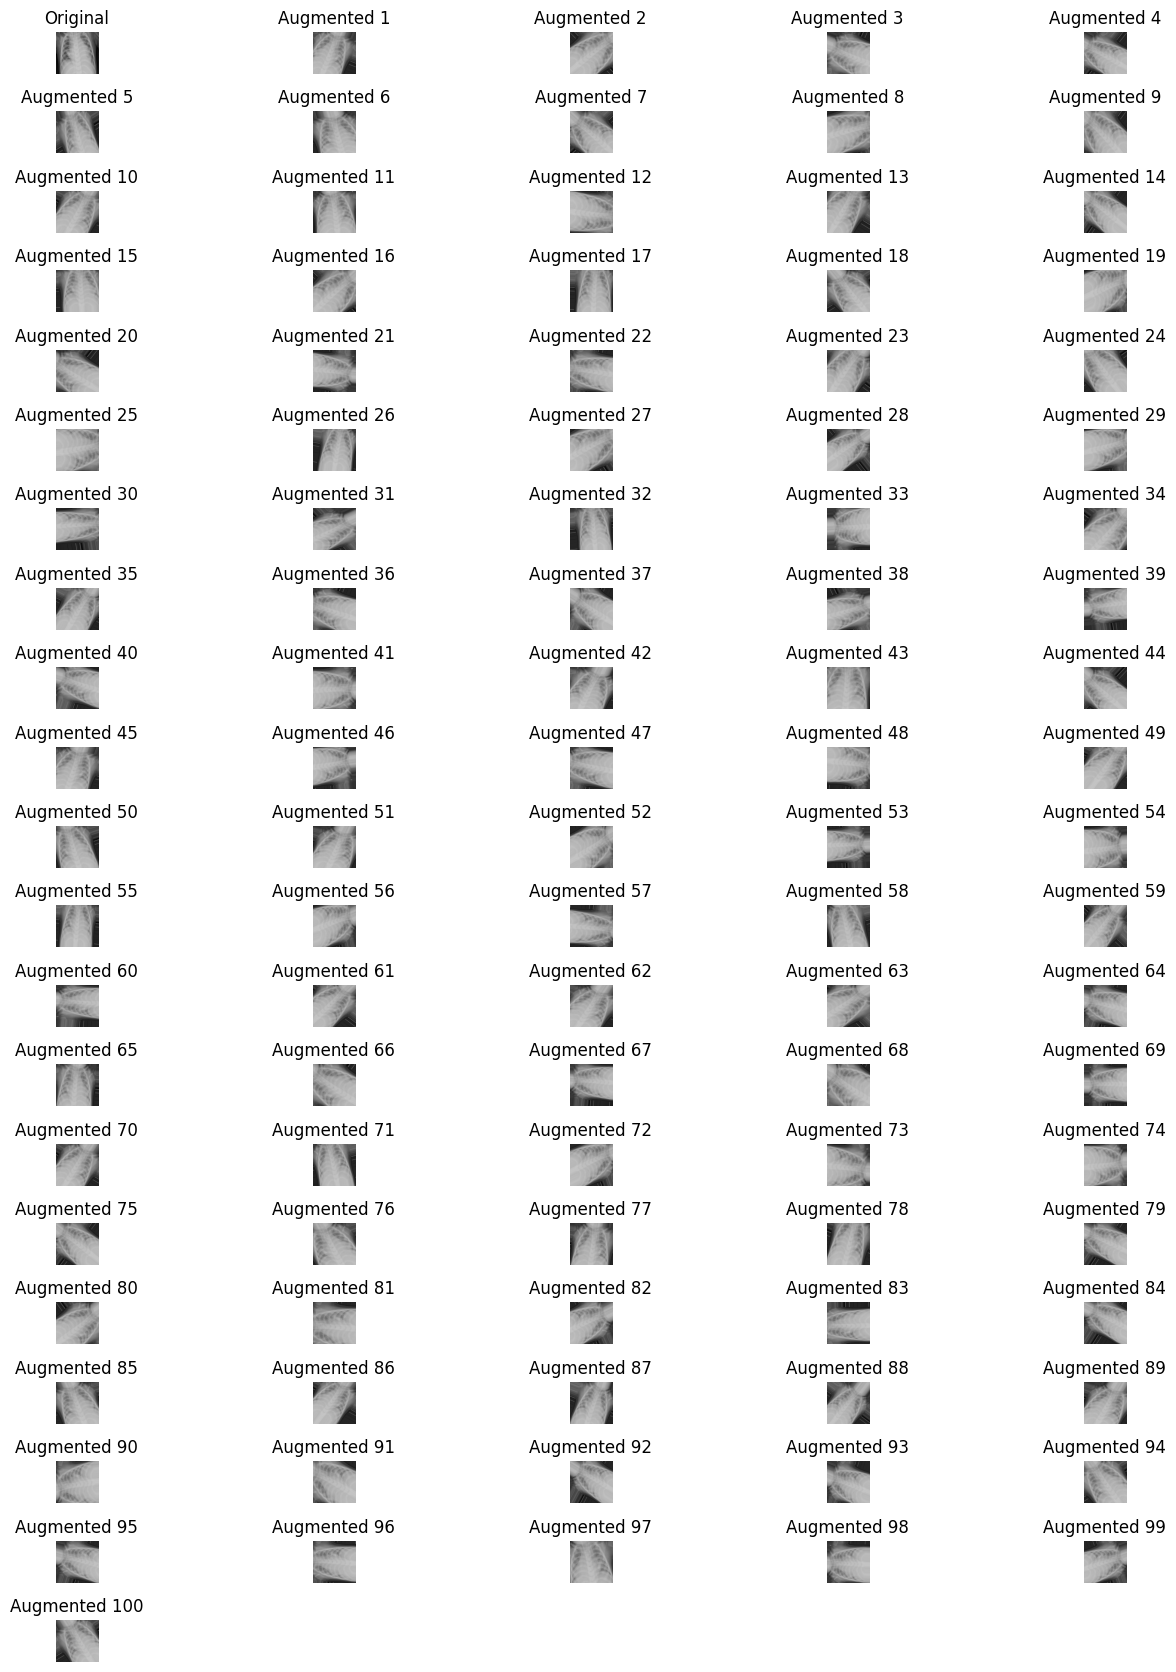

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=100,      # Rotate the image by a random angle within the specified range (in degrees)
    width_shift_range=0.1,  # Shift the image horizontally (fraction of total width)
    height_shift_range=0.1, # Shift the image vertically (fraction of total height)
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Zoom the image in/out (range for random zoom)
    horizontal_flip=True,  # Flip the image horizontally
    fill_mode='nearest'     # Fill points outside the boundaries using the nearest available value
)

# Load an example image
# Assuming 'image' is a NumPy array representing an image of shape (height, width, channels)

# Reshape the image to add the batch dimension
image = np.expand_dims(train_resized_yes[5], axis=0)

# Generate augmented images
num_augmented_images = 100  # Number of augmented images to generate
augmented_images3 = []

# Generate augmented images using the data generator
for _ in range(num_augmented_images):
    augmented_image = next(datagen.flow(image))[0]  # Generate augmented image augmented_image = next(datagen.flow(image))[0]
    augmented_image = (augmented_image * 255).astype(np.uint8)  # Convert to uint8 and scale to [0, 255]
    augmented_images3.append(augmented_image)

# Display the original and augmented images
plt.figure(figsize=(13, 20))
for i in range(num_augmented_images + 1):
    plt.subplot(25, 5, i + 1)
    if i == 0:
        plt.imshow(image.squeeze(), cmap='gray')  # Display the original image
        plt.title('Original')
    else:
        plt.imshow(augmented_images[i - 1].squeeze(), cmap='gray')  # Display augmented images
        plt.title(f'Augmented {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
train_resized_yes = np.concatenate([train_resized_yes, augmented_images, augmented_images2, augmented_images3])

In [ ]:
val_list_no = os.listdir(val_folder_path_no)
val_list_yes = os.listdir(val_folder_path_yes)

In [ ]:
len(val_list_no)

8

# **Create a List of Labels and Normalised and Reshaped Images Ready for Modelling**

In [ ]:
# Create lists to store file paths and labels
train_data = []
train_labels = []

val_data = []
val_labels = []

test_data = []
test_labels = []

# Process normal images (label: 0)
for file in train_resized_no:
    train_data.append(file)
    train_labels.append(0)

for file in val_resized_no:
    val_data.append(file)
    val_labels.append(0)

for file in test_resized_no:
    test_data.append(file)
    test_labels.append(0)

# Process pneumonia images (label: 1)
for file in train_resized_yes:
    train_data.append(file)
    train_labels.append(1)

for file in val_resized_yes:
    val_data.append(file)
    val_labels.append(1)

for filen in test_resized_yes:
    test_data.append(file)
    test_labels.append(1)

# **Plot Data**

Despite data being in a matrix of values we can still plot the relevant photo from the list

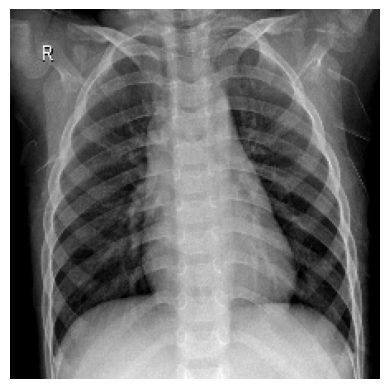

In [ ]:
# Select an individual image to display (e.g., the first image)
image_to_show = train_data[2]  # Change the index as needed

# Display the selected image
plt.imshow(image_to_show)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
train_data

[array([[[0.03529412, 0.03529412, 0.03529412],
         [0.0745098 , 0.0745098 , 0.0745098 ],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.17647059, 0.17647059, 0.17647059],
         [0.14509804, 0.14509804, 0.14509804],
         [0.11372549, 0.11372549, 0.11372549]],
 
        [[0.03529412, 0.03529412, 0.03529412],
         [0.05882353, 0.05882353, 0.05882353],
         [0.11372549, 0.11372549, 0.11372549],
         ...,
         [0.18431373, 0.18431373, 0.18431373],
         [0.14509804, 0.14509804, 0.14509804],
         [0.10196078, 0.10196078, 0.10196078]],
 
        [[0.03921569, 0.03921569, 0.03921569],
         [0.05882353, 0.05882353, 0.05882353],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.17647059, 0.17647059, 0.17647059],
         [0.15686275, 0.15686275, 0.15686275],
         [0.10196078, 0.10196078, 0.10196078]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

# **Data-Checking & Shuffling**

In [ ]:
import random

### TRAIN SHUFFLE ###

# Combine images and labels into a list of tuples
combined_data = list(zip(train_data, train_labels))

# Shuffle the combined data
random.shuffle(combined_data)

# Unzip the shuffled data back into separate lists of images and labels
train_data, train_labels = zip(*combined_data)

### VALIDATION SHUFFLE ####
combined_data = list(zip(val_data, val_labels))

# Shuffle the combined data
random.shuffle(combined_data)

# Unzip the shuffled data back into separate lists of images and labels
val_data, val_labels = zip(*combined_data)


### TEST SHUFFLE ###
combined_data = list(zip(test_data, test_labels))

# Shuffle the combined data
random.shuffle(combined_data)

# Unzip the shuffled data back into separate lists of images and labels
test_data, test_labels = zip(*combined_data)

In [ ]:
test_labels

(0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,


In [ ]:
if 1 in train_labels:
  print("One is present")
if 1 in val_labels:
  print("One is present")
if 1 in test_labels:
  print("One is present")

One is present
One is present
One is present


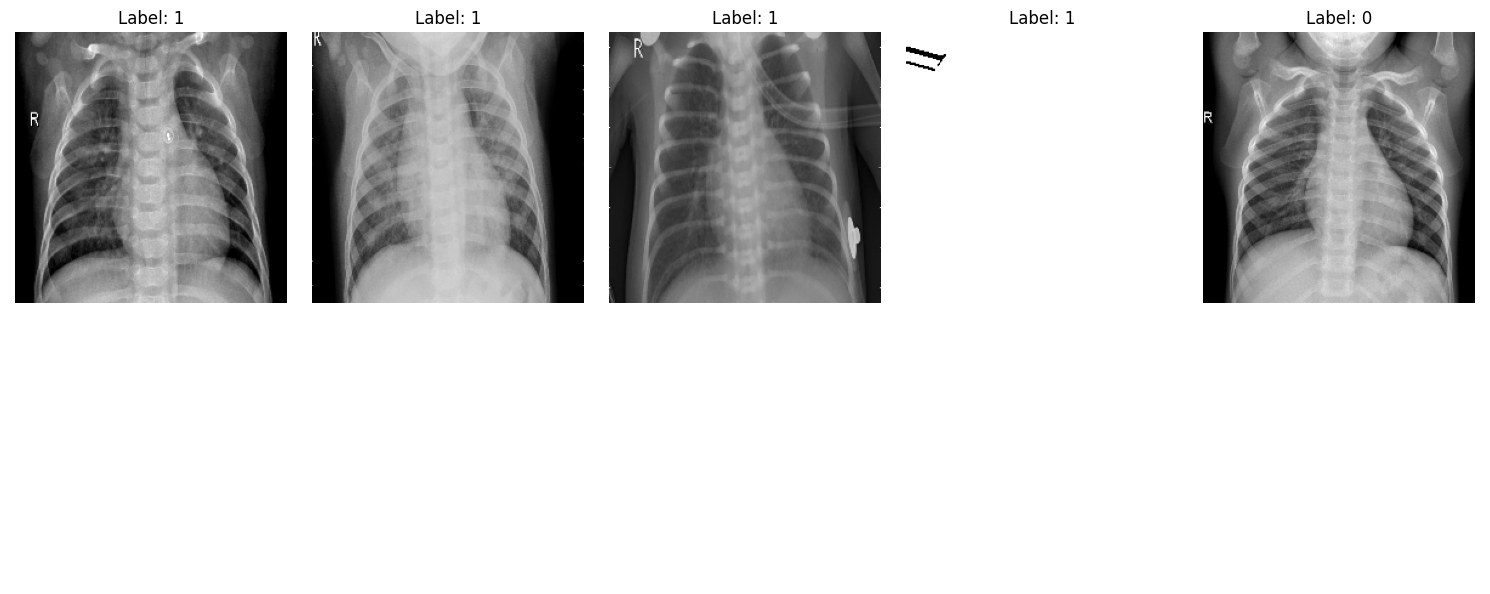

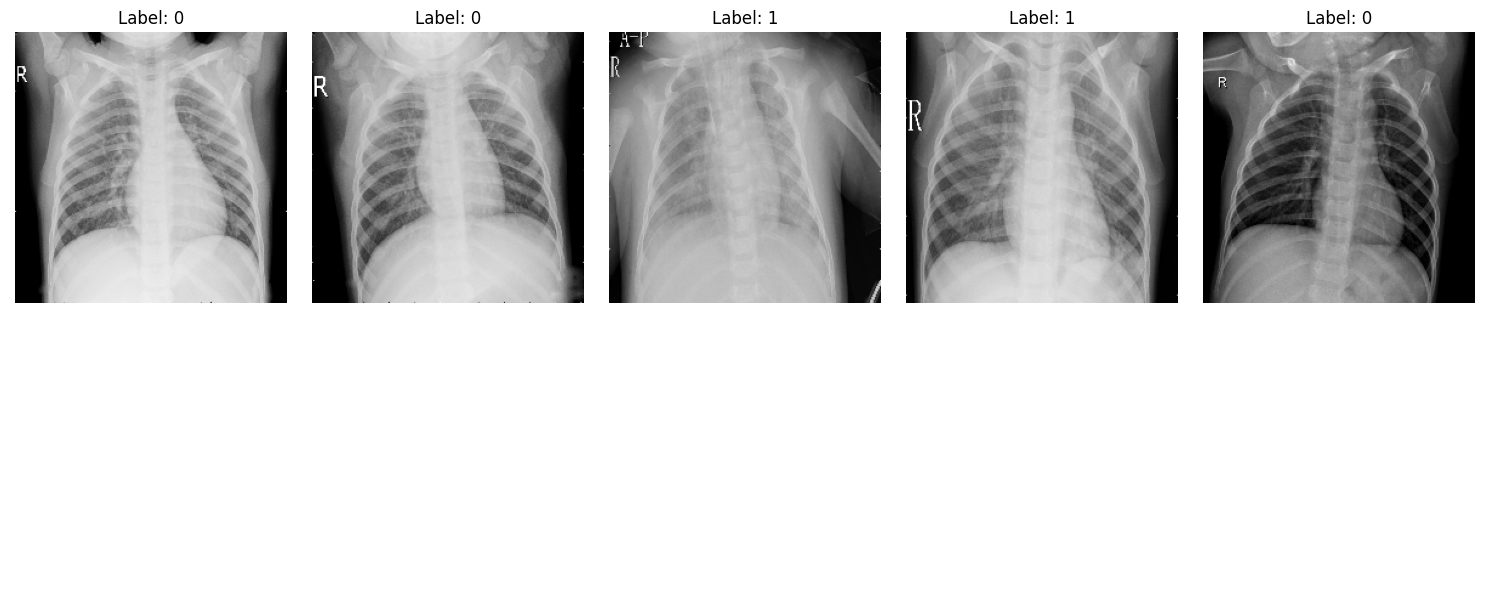

In [ ]:
import matplotlib.pyplot as plt

def plot_images_with_labels(images, labels, num_images_to_plot=5):
    # Create subplots with appropriate number of rows and columns
    num_rows = (num_images_to_plot // 5) + 1
    fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))

    # Iterate over images and labels to plot them
    for i, (image, label) in enumerate(zip(images[:num_images_to_plot], labels[:num_images_to_plot])):
        ax = axes[i // 5, i % 5] if num_rows > 1 else axes[i % 5]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title('Label: {}'.format(label))

    # Hide any remaining subplot axes
    for j in range(num_images_to_plot, num_rows * 5):
        ax = axes[j // 5, j % 5] if num_rows > 1 else axes[j % 5]
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
plot_images_with_labels(train_data, train_labels)
plot_images_with_labels(val_data, val_labels)

# **Data Preparation for Model**

In [ ]:
train_data = np.array(train_data)
val_data = np.array(val_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
type(train_data)

numpy.ndarray

# **Implement Model**

In [ ]:
def build_vgg16(input_shape=(224, 224, 3), num_classes=1):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape), #Here we are applying 64 filters over the original image using a 3x3 kernel - each filter will understand a specific feature                         #Here we apply this logic again
        MaxPooling2D((2, 2), strides=(2, 2)),
        (Dropout(0.35)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),                        #Here we are applying 128 filters over the previously convoluted image
        MaxPooling2D((2, 2), strides=(2, 2)),
        (Dropout(0.35)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='sigmoid')
    ])

    return model

# Example usage:
input_shape = (224, 224, 3)  # Input shape for VGG-16
num_classes = 1  # Number of classes in ImageNet dataset
vgg16_model = build_vgg16(input_shape, num_classes)

# Compile the model
vgg16_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

# Define ModelCheckpoint callback to save the best weights
checkpoint_callback = ModelCheckpoint('best_model_weights.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
vgg16_model.fit(train_data, train_labels, batch_size = 16, epochs=15, validation_data=(val_data, val_labels), callbacks=[early_stopping_callback, checkpoint_callback])

# Load the best weights
vgg16_model.load_weights('best_model_weights.h5')

Epoch 1/15
113/113 [==============================] - ETA: 0s - loss: 7.1612 - accuracy: 0.7233
Epoch 1: val_loss improved from inf to 0.45785, saving model to best_model_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


113/113 [==============================] - 523s 5s/step - loss: 7.1612 - accuracy: 0.7233 - val_loss: 0.4578 - val_accuracy: 0.7500
Epoch 2/15
113/113 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9256
Epoch 2: val_loss improved from 0.45785 to 0.27498, saving model to best_model_weights.h5
113/113 [==============================] - 512s 5s/step - loss: 0.2010 - accuracy: 0.9256 - val_loss: 0.2750 - val_accuracy: 0.8750
Epoch 3/15
113/113 [==============================] - ETA: 0s - loss: 0.1332 - accuracy: 0.9478
Epoch 3: val_loss improved from 0.27498 to 0.22231, saving model to best_model_weights.h5
113/113 [==============================] - 515s 5s/step - loss: 0.1332 - accuracy: 0.9478 - val_loss: 0.2223 - val_accuracy: 0.8125
Epoch 4/15
113/113 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9706
Epoch 4: val_loss did not improve from 0.22231
113/113 [==============================] - 502s 4s/step - loss: 0.0894 - accuracy: 0.9706

In [ ]:
predictions = vgg16_model.predict(test_data)


 1/16 [>.............................] - ETA: 31s

In [ ]:
# Set NumPy's print options to display full precision
np.set_printoptions(precision=None)

# Convert the probabilities to a Python list
probabilities_list = np.array(predictions).tolist()

# Print the probabilities list
for prob in probabilities_list:
    print(prob)

In [ ]:
# Define a threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions >= threshold).astype(int)

print(binary_predictions)

from sklearn.metrics import accuracy_score

accuracy_score(binary_predictions, test_labels)
